## Book Length Statistics

In [1]:
import glob
import os
from collections import Counter
from collections import defaultdict

import spacy
from spacy.tokens import DocBin


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns


doc_lemma_files = {
    'whole_unfiltered': '../../data/topic_models/doc_lemmas_num.trankit.csv',
    'window_unfiltered': '../../data/topic_models/doc_lemmas_num.trankit_5000.csv',
    'whole_filtered': '../../data/topic_models/doc_lemmas_num-filtered_0.1_0.01.trankit.csv',
    'window_filtered': '../../data/topic_models/doc_lemmas_num-filtered_0.1_0.01.trankit_5000.csv'
}

doc_len = {doc_type: pd.read_csv(doc_lemma_files[doc_type], sep='\t', dtype={'doc_id': str}) for doc_type in doc_lemma_files}

In [63]:
doc_len.keys()
doc_len['whole_filtered'] = doc_len['whole_filtered'].rename(columns={'num_lemmas': 'num_filtered_lemmas'})
doc_len['window_filtered'] = doc_len['window_filtered'].rename(columns={'num_lemmas': 'num_filtered_lemmas'})

doc_len['whole_filtered']['doc_id'] = doc_len['whole_filtered'].doc_id.apply(lambda x: x[:-2])

whole = pd.merge(doc_len['whole_unfiltered'], doc_len['whole_filtered'], on='doc_id')
whole['filtered_frac'] = whole.num_filtered_lemmas / whole.num_lemmas

window = pd.merge(doc_len['window_unfiltered'], doc_len['window_filtered'], on='doc_id')
window['filtered_frac'] = window.num_filtered_lemmas / window.num_lemmas


In [64]:
whole

,doc_id,num_lemmas,num_filtered_lemmas,filtered_frac
0,9789045020860,53627,5488,0.102337
1,9789403127705,44268,2617,0.059117
2,9789025440879,27950,1376,0.049231
3,9789026152412,47268,1363,0.028836
4,9789021572246,41345,3062,0.074060
...,...,...,...,...
18401,9789029731027,51997,1717,0.033021
18402,9789021560229,17581,463,0.026335
18403,9789020411324,16247,1034,0.063643
18404,9789460415210,25373,1591,0.062704


In [65]:
window

,doc_id,num_lemmas,num_filtered_lemmas,filtered_frac
0,9789045020860-0,2103,73,0.034712
1,9789045020860-1,1980,174,0.087879
2,9789045020860-2,2170,160,0.073733
3,9789045020860-3,2101,163,0.077582
4,9789045020860-4,2108,168,0.079696
...,...,...,...,...
393013,9789025433086-20,2122,77,0.036287
393014,9789025433086-21,2187,81,0.037037
393015,9789025433086-22,2141,135,0.063055
393016,9789025433086-23,2094,113,0.053964


In [50]:
whole.describe()

,num_lemmas,num_filtered_lemmas,filtered_frac
count,18406.000000,18406.000000,18406.000000
mean,42332.229110,2565.448712,0.062496
std,34116.627135,2552.895344,0.034312
min,5.000000,2.000000,0.006198
25%,22687.500000,1130.000000,0.041168
50%,35726.500000,1912.500000,0.054513
75%,51809.000000,3112.000000,0.075381
max,640327.000000,51127.000000,0.513695


In [66]:
window.describe()

,num_lemmas,num_filtered_lemmas,filtered_frac
count,393018.000000,393018.000000,393018.000000
mean,1983.398096,93.022706,0.046529
std,278.735041,64.748132,0.030527
min,4.000000,2.000000,0.003652
25%,1931.000000,57.000000,0.029526
50%,2008.000000,78.000000,0.039850
75%,2095.000000,112.000000,0.055179
max,7301.000000,1270.000000,0.600000


In [71]:
for repr in ['num_lemmas', 'num_filtered_lemmas']:
    whole[f"log_{repr}"] = whole[repr].apply(np.log)
    window[f"log_{repr}"] = window[repr].apply(np.log)

whole

,doc_id,num_lemmas,num_filtered_lemmas,filtered_frac,log_num_lemmas,log_num_filtered_lemmas
0,9789045020860,53627,5488,0.102337,10.889808,8.610319
1,9789403127705,44268,2617,0.059117,10.698017,7.869784
2,9789025440879,27950,1376,0.049231,10.238172,7.226936
3,9789026152412,47268,1363,0.028836,10.763589,7.217443
4,9789021572246,41345,3062,0.074060,10.629707,8.026824
...,...,...,...,...,...,...
18401,9789029731027,51997,1717,0.033021,10.858941,7.448334
18402,9789021560229,17581,463,0.026335,9.774574,6.137727
18403,9789020411324,16247,1034,0.063643,9.695664,6.941190
18404,9789460415210,25373,1591,0.062704,10.141441,7.372118


In [72]:
window

,doc_id,num_lemmas,num_filtered_lemmas,filtered_frac,log_num_lemmas,log_num_filtered_lemmas
0,9789045020860-0,2103,73,0.034712,7.651120,4.290459
1,9789045020860-1,1980,174,0.087879,7.590852,5.159055
2,9789045020860-2,2170,160,0.073733,7.682482,5.075174
3,9789045020860-3,2101,163,0.077582,7.650169,5.093750
4,9789045020860-4,2108,168,0.079696,7.653495,5.123964
...,...,...,...,...,...,...
393013,9789025433086-20,2122,77,0.036287,7.660114,4.343805
393014,9789025433086-21,2187,81,0.037037,7.690286,4.394449
393015,9789025433086-22,2141,135,0.063055,7.669028,4.905275
393016,9789025433086-23,2094,113,0.053964,7.646831,4.727388


In [82]:
whole.describe([.05, .1, .16, .33, .5, .67, .84, .9, .95])

,num_lemmas,num_filtered_lemmas,filtered_frac,log_num_lemmas,log_num_filtered_lemmas
count,18406.000000,18406.000000,18406.000000,18406.000000,18406.000000
mean,42332.229110,2565.448712,0.062496,10.369250,7.491344
std,34116.627135,2552.895344,0.034312,0.878861,0.922887
min,5.000000,2.000000,0.006198,1.609438,0.693147
5%,6997.000000,374.000000,0.028996,8.853237,5.924256
10%,12360.000000,640.500000,0.033110,9.422220,6.462249
16%,16877.600000,862.000000,0.036554,9.733743,6.759255
33%,27350.800000,1367.000000,0.045129,10.216501,7.220374
50%,35726.500000,1912.500000,0.054513,10.483648,7.556167
67%,45929.700000,2616.350000,0.067219,10.734867,7.869535


In [78]:
temp = whole.describe()
for repr in ['log_num_lemmas', 'log_num_filtered_lemmas']:
    min_var = np.exp(temp.loc['mean'][repr] - temp.loc['std'][repr])
    max_var = np.exp(temp.loc['mean'][repr] + temp.loc['std'][repr])
    print(f"{repr: >25}\t{np.exp(temp.loc['mean'][repr]): >8.0f}\t{min_var: >8.0f}\t{max_var: >8.0f}")

           log_num_lemmas	   31865	   13232	   76735
  log_num_filtered_lemmas	    1792	     712	    4511


In [83]:
from impfic_core.map.map_genre import read_genre_file

work_genre_file = '../../data/book_metadata/work_isbn_title_genre.tsv.gz'

work_genre = read_genre_file(work_genre_file)
work_genre.head(2)

,work_id,record_id,record_id_type,work_year,work_author,work_title,work_length,nur,thema,bisac,brinkman,unesco,nur_genre
0,impfic-work-1,9789029573092,isbn,2010.0,['Ingalill Roos'],['Energievreters -- omgaan met mensen waar je ...,NaN,[770],NaN,NaN,[sociale relaties],"[Sociologie, statistiek]",Non-fiction
1,impfic-work-1,326085068,ppn,2010.0,['Ingalill Roos'],['Energievreters -- omgaan met mensen waar je ...,NaN,[770],NaN,NaN,[sociale relaties],"[Sociologie, statistiek]",Non-fiction


In [89]:
#work_genre[work_genre.record_id.isin(whole.doc_id)]
whole_genre = pd.merge(whole, work_genre, left_on='doc_id', right_on='record_id', how='left')
whole_genre.groupby('nur_genre').filtered_frac.describe()

,count,mean,std,min,25%,50%,75%,max
nur_genre,,,,,,,,
Children_fiction,512.0,0.045967,0.026958,0.017698,0.034819,0.041599,0.049624,0.333333
Fantasy_fiction,365.0,0.052950,0.045534,0.021821,0.039858,0.046992,0.054386,0.426023
Historical_fiction,340.0,0.042387,0.010869,0.016223,0.035185,0.041446,0.046676,0.091273
Literary_fiction,5518.0,0.055186,0.021257,0.011331,0.041153,0.052180,0.065656,0.437873
Literary_thriller,823.0,0.049190,0.013151,0.020138,0.040362,0.047468,0.054607,0.179318
Non-fiction,5243.0,0.084330,0.044892,0.016628,0.056195,0.077960,0.101280,0.513695
Other fiction,1994.0,0.072274,0.029742,0.006198,0.050161,0.070718,0.091370,0.410598
Regional_fiction,886.0,0.033335,0.009930,0.012248,0.026123,0.032503,0.039564,0.083340
Romanticism,530.0,0.037328,0.007307,0.016268,0.033032,0.036779,0.041162,0.068895


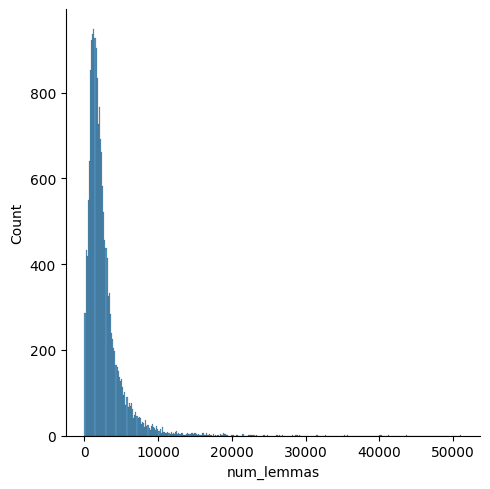

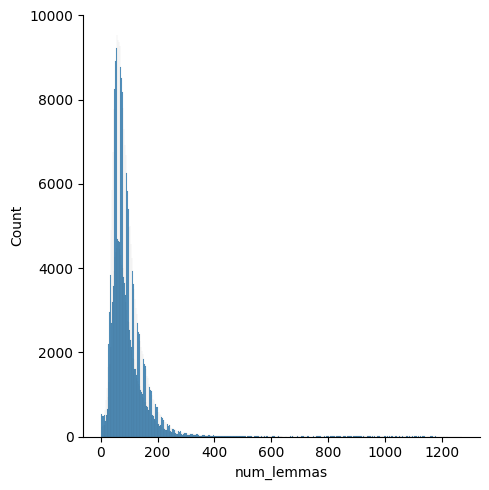

In [11]:
sns.displot(data=doc_len['whole'], x='num_lemmas')
sns.displot(data=doc_len['window'], x='num_lemmas')

#doc_len['whole']

In [3]:
spacy_nlp = spacy.load('nl_core_news_lg')

In [4]:
def read_docbin(parsed_file, spacy_nlp):
    doc_bin = DocBin().from_disk(path=parsed_file)
    return list(doc_bin.get_docs(spacy_nlp.vocab))


spacy_dir = "/Volumes/Samsung_T5/Data/ImpFic/books/spacy_parsed/"

parsed_files = glob.glob(os.path.join(spacy_dir, '*.docbin'))

parsed_file = {os.path.split(parsed_file.replace('.docbin', ''))[-1]: parsed_file for parsed_file in parsed_files}

for isbn in parsed_file:
    spacy_docs = read_docbin(parsed_file[isbn], spacy_nlp)
    for doc in spacy_docs:
        if len(doc) < 10:
            continue
        print(doc)
        print([word for word in doc])
        print([word for word in doc if word.is_punct is False])
        break

    print(isbn)
    break


Tien jaar voor mijn moeder op de wereld kwam had iemand bedacht dat luchtballonnen konden worden bestuurd met getemde adelaars. Ik las dat in Mengelwerk voor Beschaafde Kringen, een boek dat we bezaten. Het is nooit wat geworden met die adelaars, maar mijn moeder zei tegen me dat aan zo’n luchtballon een kamer kon worden gehangen waarin je woonde, zodat je overal naartoe ging en toch dezelfde vloer onder je voeten hield. Ze vond dat ze in de verkeerde tijd was neergezet, maar als ik vroeg in welke tijd ze liever geboren had willen worden zei ze alleen later, alsof dat een herkansing inhield van haar leven.

[Tien, jaar, voor, mijn, moeder, op, de, wereld, kwam, had, iemand, bedacht, dat, luchtballonnen, konden, worden, bestuurd, met, getemde, adelaars, ., Ik, las, dat, in, Mengelwerk, voor, Beschaafde, Kringen, ,, een, boek, dat, we, bezaten, ., Het, is, nooit, wat, geworden, met, die, adelaars, ,, maar, mijn, moeder, zei, tegen, me, dat, aan, zo, ’n, luchtballon, een, kamer, kon, word

In [5]:
import time

book_stats = defaultdict(list)
para_stats = defaultdict(list)
para_dist = defaultdict(list)


start = time.time()

for i, isbn in enumerate(parsed_file):
    spacy_docs = read_docbin(parsed_file[isbn], spacy_nlp)
    words = 0
    sents = 0
    paras = 0
    for doc in spacy_docs:
        para_stats['words'].append(len(doc))
        words += len(doc)
        para_stats['sents'].append(len([s for s in doc.sents]))
        sents += len([s for s in doc.sents])
        paras += 1
        para_dist[isbn].append(len(doc))
    book_stats['words'].append(words)
    book_stats['sents'].append(sents)
    book_stats['paras'].append(paras)
    if (i+1) % 1000 == 0:
        print(f'{i+1: >6}\tparsed books processed, {time.time() - start: >.2f} seconds')



  1000	parsed books processed, 73.88 seconds
  2000	parsed books processed, 130.63 seconds
  3000	parsed books processed, 203.83 seconds
  4000	parsed books processed, 311.54 seconds
  5000	parsed books processed, 393.67 seconds
  6000	parsed books processed, 499.63 seconds
  7000	parsed books processed, 634.89 seconds
  8000	parsed books processed, 769.13 seconds
  9000	parsed books processed, 911.33 seconds
 10000	parsed books processed, 1019.51 seconds


In [6]:
import numpy as np

for level in book_stats:
    a = np.array(book_stats[level])
    print(f"{level} & {a.sum()} & {a.min()} & {a.max()} & {a.mean(): >.1f} & {np.median(a)} & {a.std(): >.1f}")

words & 931220543 & 1 & 655744 & 85268.8 & 66577.0 & 71191.9
sents & 104511706 & 1 & 80140 & 9569.8 & 7213.0 & 8322.8
paras & 24356023 & 1 & 21355 & 2230.2 & 1668.0 & 2000.9


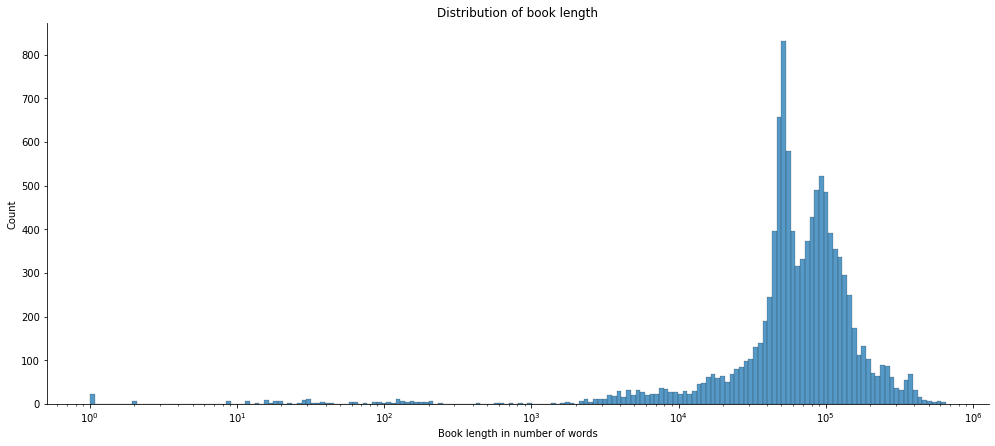

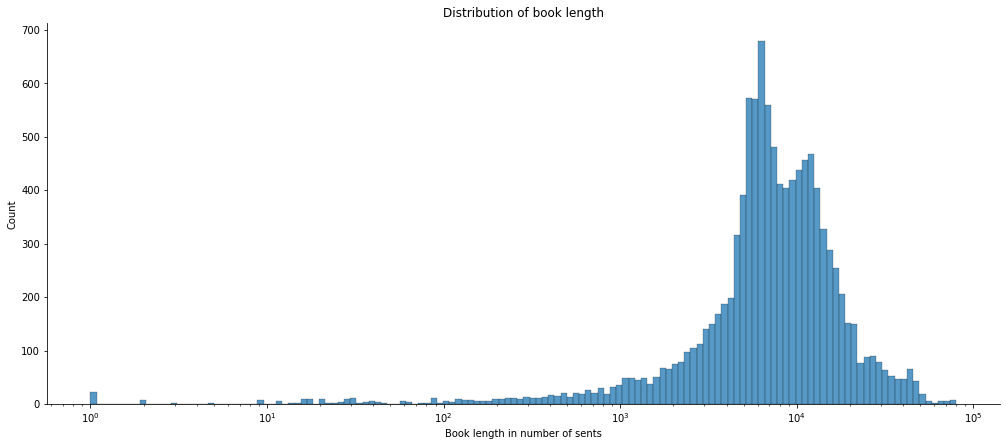

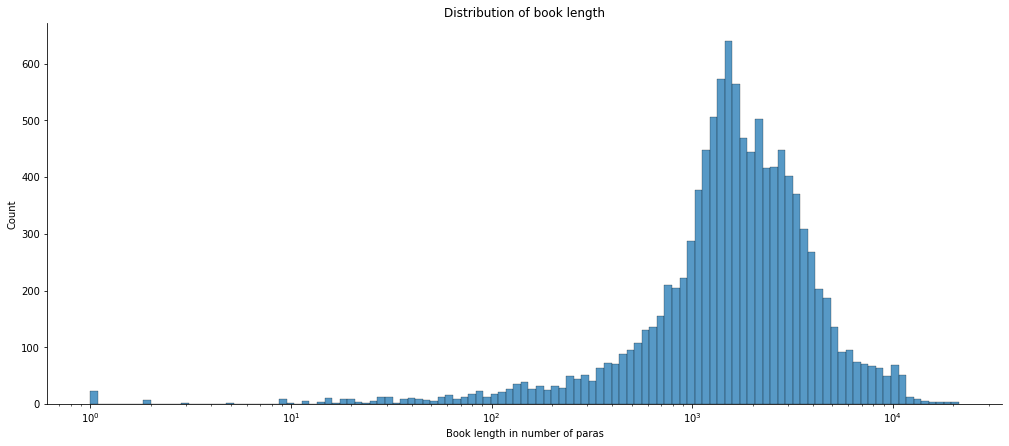

In [8]:
import seaborn as sns

for level in book_stats:
    grid = sns.displot(book_stats[level], log_scale=(10, False))
    grid.ax.set_title(f'Distribution of book length')
    grid.ax.set_xlabel(f'Book length in number of {level}')
    grid.figure.set_size_inches(16,6)
    grid.figure.savefig(f'../images/book_length_dist-{level}-300dpi.png', dpi=300)


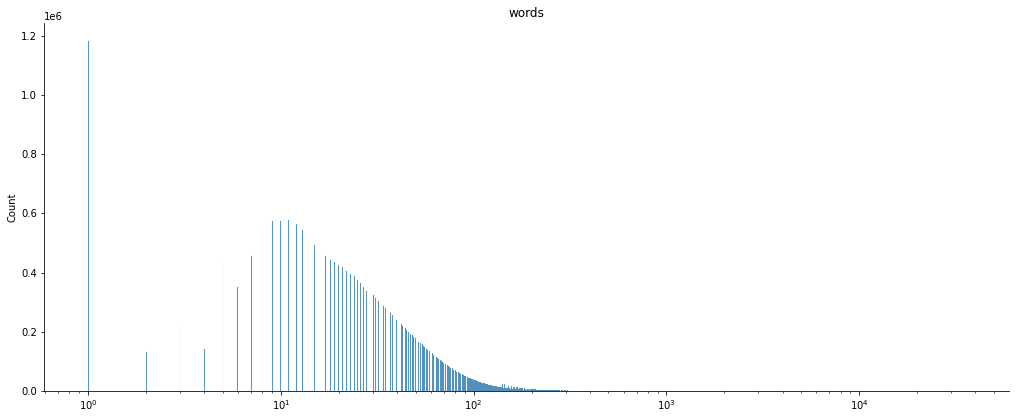

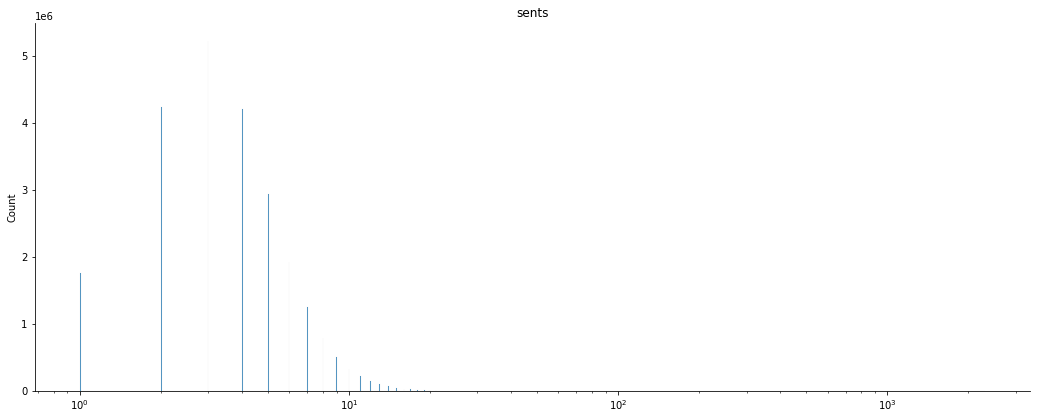

In [85]:
for level in para_stats:
    grid = sns.displot(para_stats[level], log_scale=(10, False))
    grid.ax.set_title(level)
    grid.figure.set_size_inches(16,6)


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for isbn in para_dist:
    dist = np.array(para_dist[isbn])
    #print(f"{isbn}\t{len(dist): >6}\t{dist.min(): >4}{np.median(dist): >6.1f}{dist.mean(): >6.1f}{dist.max(): >6}{dist.std(): >8.2f}")

dist = np.array([num for isbn in para_dist for num in para_dist[isbn]])
print()
print(f"{'Paragraphs'}\n{'Total: ': <20}{len(dist): >8}")
print(f"{'Min length:': <20}{dist.min(): >8}")
print(f"{'Max length:': <20}{dist.max(): >8}")
print(f"{'Median length:': <20}{np.median(dist): >8.0f}")
print(f"{'Mean length:': <20}{dist.mean(): >8.0f}")
print(f"{'Std. dev.:': <20}{dist.std(): >8.0f}")



Paragraphs
Total:              23943706
Min length:                1
Max length:            35298
Median length:            27
Mean length:              38
Std. dev.:                46


In [27]:
a = np.array(book_stats['words'])
b = np.log(a)
a.mean(), b.mean(), b.std(), np.exp(b.mean()), np.exp(b.std())

(85268.7980038458,
 10.929334467601254,
 1.3584288076499969,
 55789.13787049551,
 3.8900764393274216)

In [48]:
from collections import Counter


lf = Counter((b * 10).astype(int) / 10)

for l in sorted(lf):
    print(l, lf[l])

0.0 22
0.6 7
1.0 1
2.1 8
2.4 6
2.6 2
2.7 10
2.8 10
2.9 8
3.0 3
3.1 1
3.2 3
3.3 9
3.4 13
3.5 2
3.6 7
3.7 3
3.8 1
4.0 4
4.1 4
4.2 1
4.3 2
4.4 7
4.5 3
4.6 5
4.7 5
4.8 13
4.9 8
5.0 7
5.1 6
5.2 5
5.3 7
5.4 4
5.5 1
5.6 2
5.8 1
5.9 1
6.0 2
6.3 3
6.4 3
6.5 2
6.7 2
6.8 2
7.0 1
7.2 2
7.3 1
7.4 5
7.5 3
7.6 6
7.7 14
7.8 8
7.9 17
8.0 15
8.1 25
8.2 39
8.3 20
8.4 37
8.5 41
8.6 35
8.7 28
8.8 35
8.9 47
9.0 43
9.1 36
9.2 38
9.3 34
9.4 37
9.5 60
9.6 80
9.7 88
9.8 89
9.9 73
10.0 90
10.1 114
10.2 129
10.3 139
10.4 191
10.5 245
10.6 379
10.7 740
10.8 1097
10.9 679
11.0 447
11.1 460
11.2 544
11.3 645
11.4 685
11.5 610
11.6 497
11.7 454
11.8 377
11.9 235
12.0 159
12.1 157
12.2 101
12.3 104
12.4 124
12.5 85
12.6 42
12.7 66
12.8 85
12.9 31
13.0 13
13.1 11
13.2 6
13.3 7


In [49]:
np.exp(11.4)

89321.72336080558

In [54]:
for order in [1, 10, 100, 1000, 10000, 100000]:
    print(order, len(a[a <= order]))

1 22
10 38
100 138
1000 216
10000 679
100000 7854
